Importing Libraries

In [48]:

#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("garments_worker_productivity.csv")

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Data Cleaning

In [7]:

#renaming ambiguous columns
data = data.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [8]:
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive"]

In [9]:
data.isnull().sum()


date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
data.work_in_progress.skew() # Data is positively skewed

9.741786273952965

In [11]:
#filling in missing values with median as opposed to mean since the data is skewed

data['work_in_progress'].fillna(data['work_in_progress'].median(),inplace=True)

data.work_in_progress.median()
     

1039.0

In [12]:
data.work_in_progress.skew()

12.892083883649814

In [13]:
data['work_in_progress'].fillna(data['work_in_progress'].median(),inplace=True)


data.work_in_progress.median()
     
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
std_minute_value         0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
def title(x):
  return x.replace('_', ' ') #Removing _ from titles


In [16]:

#checking for anomalies

#None of the values in the continuous columns should be negative
for col in contin:
  print(len(data[data[col] < 0]))
#none had values < 0 

0
0
0
0
0
0


In [17]:
#checking for anomalies

#number of workers in each team should be a whole number
data['no_of_workers'].unique()

#there are some values with decimal points. 

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [18]:
#to deal with the anomalies above, the figures will be truncated

data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

In [19]:
data['no_of_workers'].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6], dtype=int64)

In [20]:
for col in cat:
  print(col)
  print(data[col].unique())
  
  
  print('\n')
     

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




In [21]:

#exploring the anomalous quarter5
data[data['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,1039.0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,1039.0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,1039.0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,1039.0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,1039.0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,1039.0,1200,0,0.0,0,0,10,0.853667


In [22]:

#replacing quarter5 (given to jan days above 28) with quarter4
data['quarter'] = data.quarter.str.replace('Quarter5', 'Quarter4')


#checking that there are now 4 quarters only
data.quarter.unique()

# Removing the word Quarter from the quarter column and leave the numbers
data['quarter'] = data['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
data['quarter'] = data['quarter'].astype(int)

#confirming changes
print(data.quarter.unique())
print(data.quarter.dtype)
     

[1 2 3 4]
int32


In [49]:


# Correcting the spelling of sewing in the department column
data['department'] = data['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
data['department'] = data['department'].str.replace('finishing ','finishing')

#confirming changes
data['department'].unique()
     

array(['sewing', 'finishing'], dtype=object)

In [24]:
#datatype conversion

#date column to datetime

data['date'] = pd.to_datetime(data['date'])


#checking that conversion occured
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int32         
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   std_minute_value       1197 non-null   float64       
 7   work_in_progress       1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [25]:

#saving cleaned data
data.to_csv('cleaned_productivity',index=False)

Analysis

In [50]:

#statistical summaries of various numerical variables
data[contin].describe()

,targeted_productivity,std_minute_value,work_in_progress,over_time,idle_men,incentive
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1126.437761,4567.460317,0.369256,38.210526
std,0.097891,10.943219,1397.653191,3348.823563,3.268987,160.182643
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000
25%,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000
75%,0.800000,24.260000,1083.000000,6960.000000,0.000000,50.000000
max,0.800000,54.560000,23122.000000,25920.000000,45.000000,3600.000000


Data Distribution

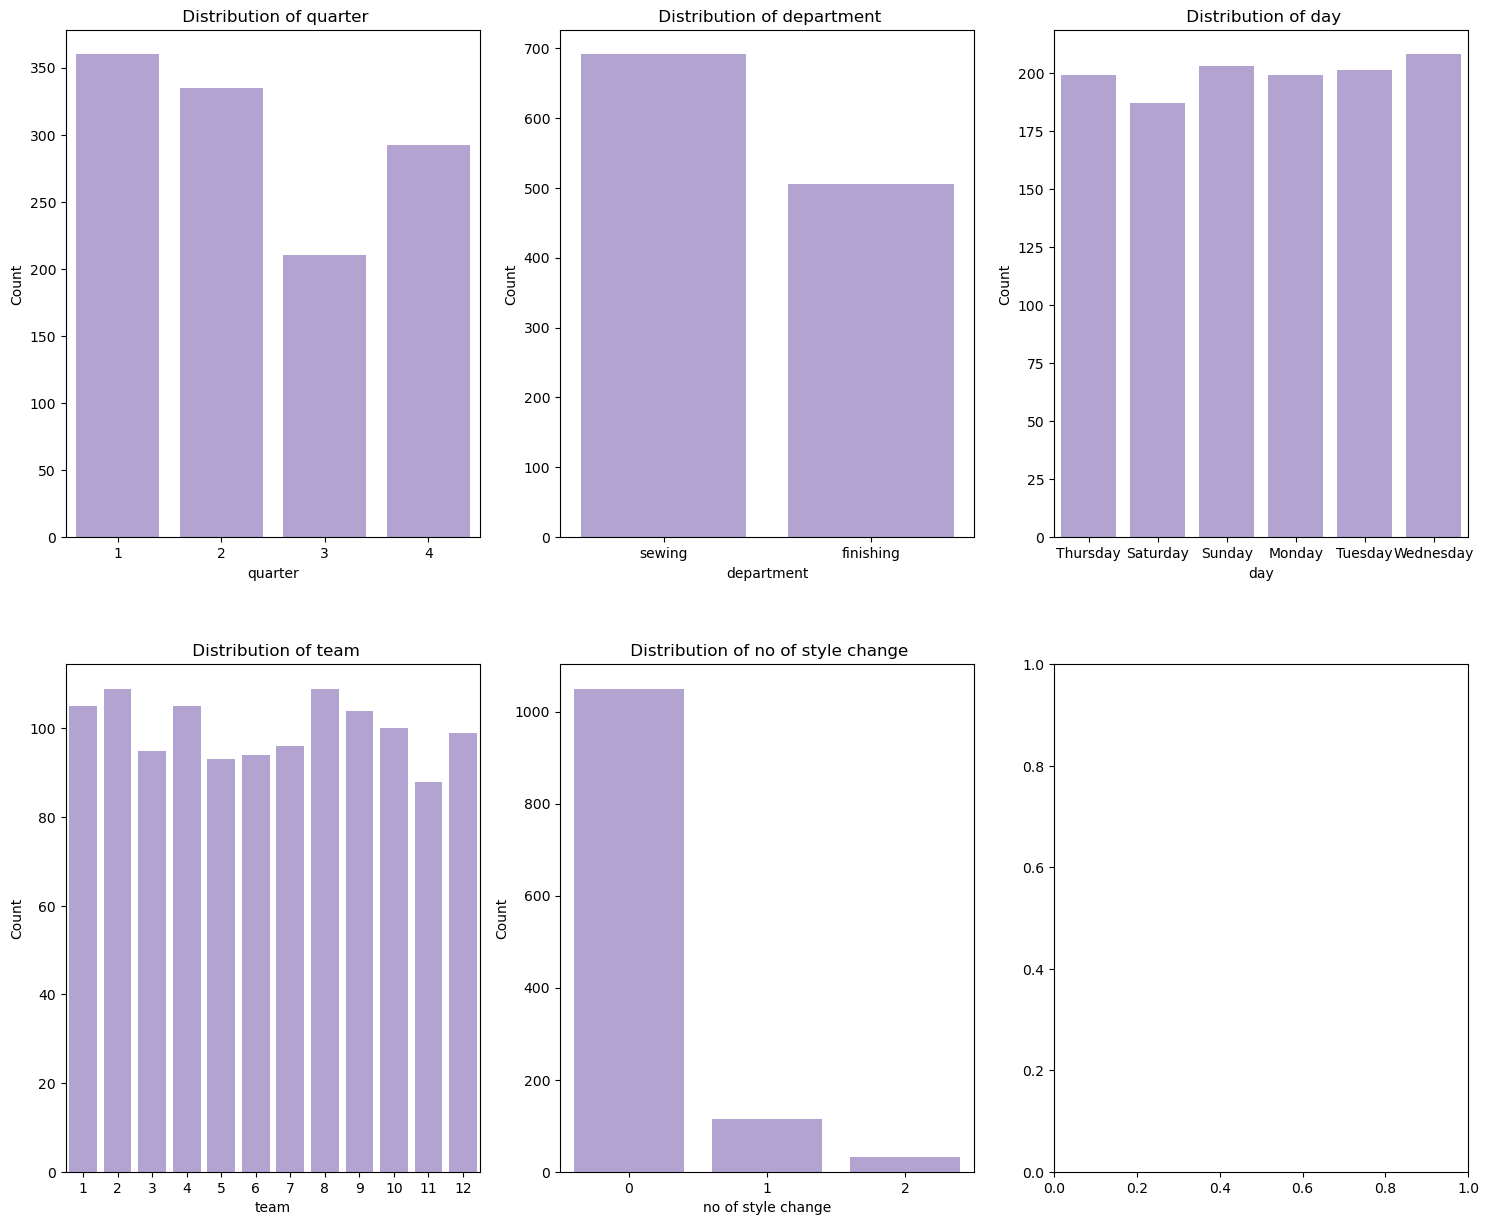

In [51]:
#countplots
fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
  if i < 5:
    sns.countplot(x=data[cat[i]], ax=ax, color="#B19CD8")
    ax.set_title(f" Distribution of {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("Count")


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()
     


*Actual productivity by day of week, department, quarter of the month, team*

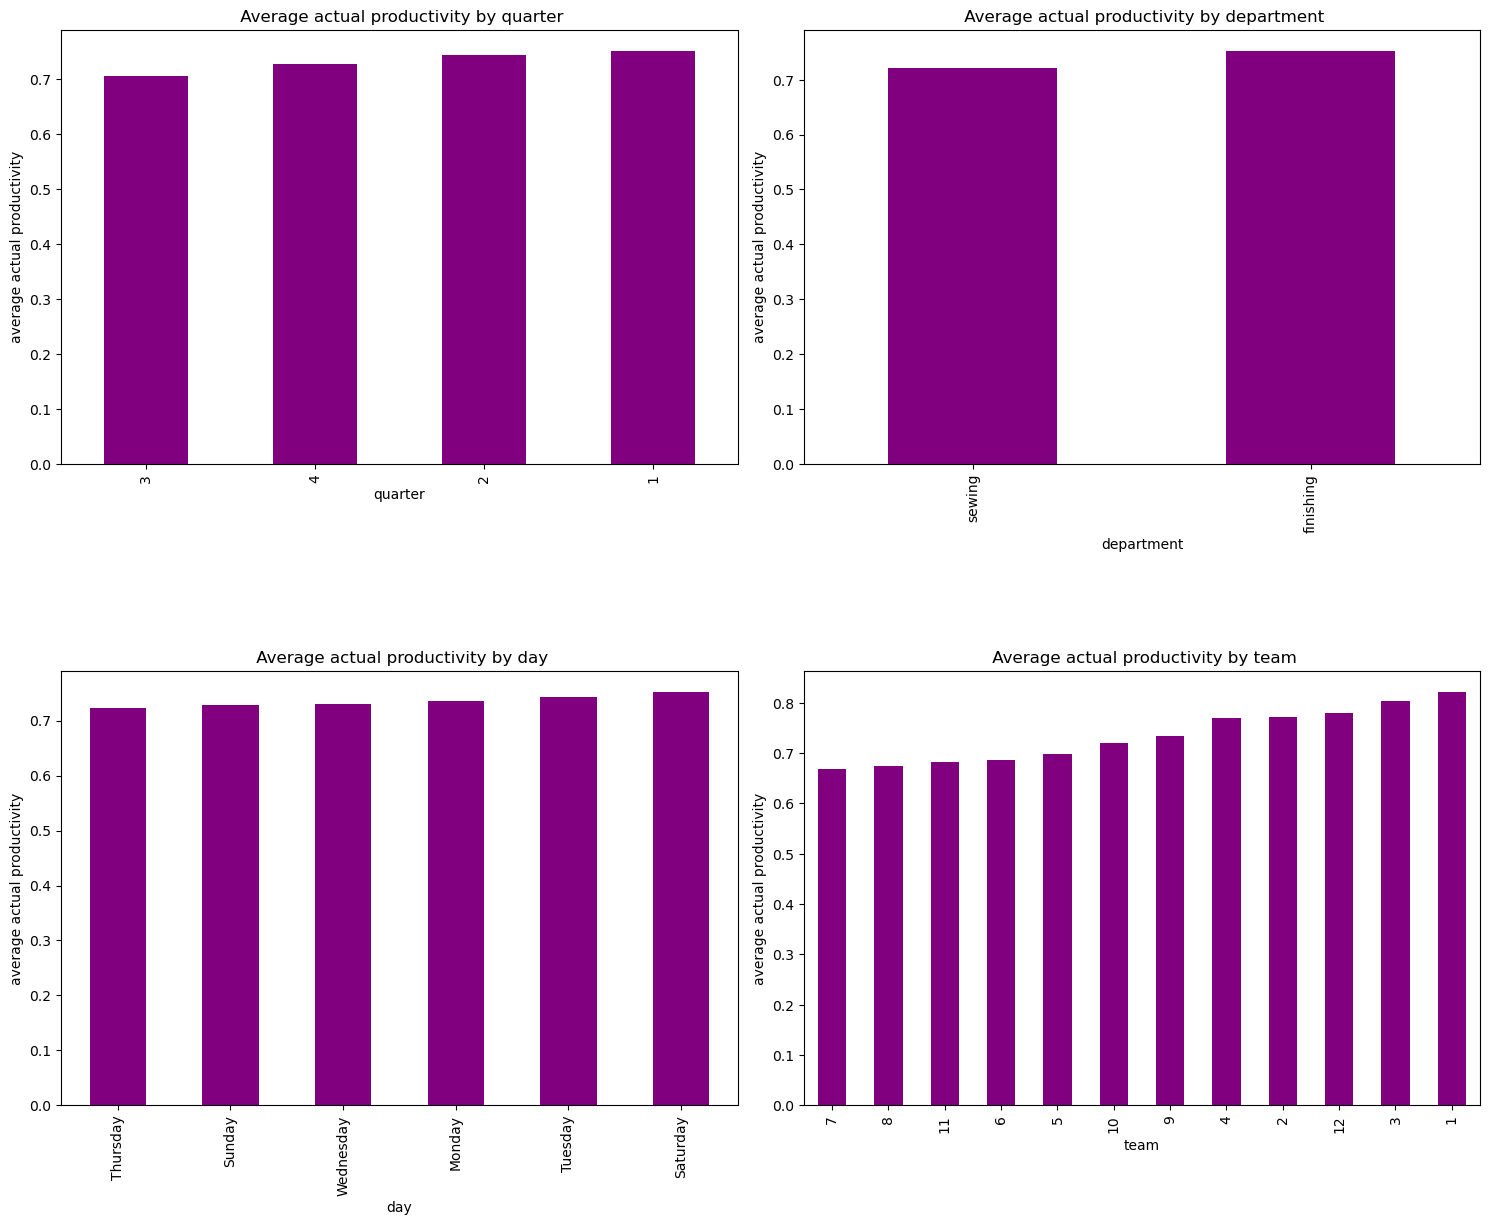

In [52]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
    
    data.groupby([cat[i]])['actual_productivity'].mean().nsmallest(data[cat[i]].nunique()).plot.bar(ax=ax, color='purple')
    
    ax.set_title(f" Average actual productivity by {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("average actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()
     


Encoding

In [53]:

#checking for columns with object datatype
for col in cat:
  if data[col].dtype == "object":
    print(col)

department
day


In [34]:
#creating a copy of the dataframe
df_enc = data.copy()

print(data.day.unique())
print(data.department.unique())
     
     

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['sewing' 'finishing']


In [36]:
#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})


# checking that the values were encoded
#
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]
[3 4 5 0 1 2]


C:\Users\Dell\AppData\Local\Temp\ipykernel_14928\931078743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_enc.corr()


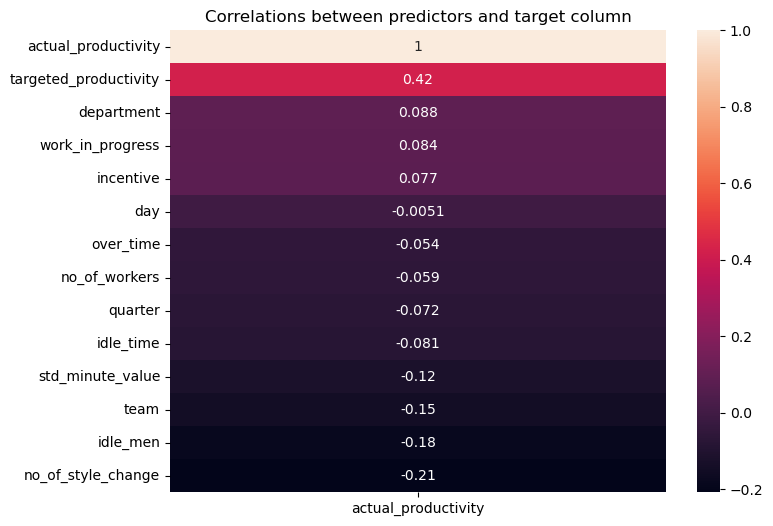

In [37]:
#highlighting correlations specifically with target
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14928\2650082505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_enc.corr(),annot=True)


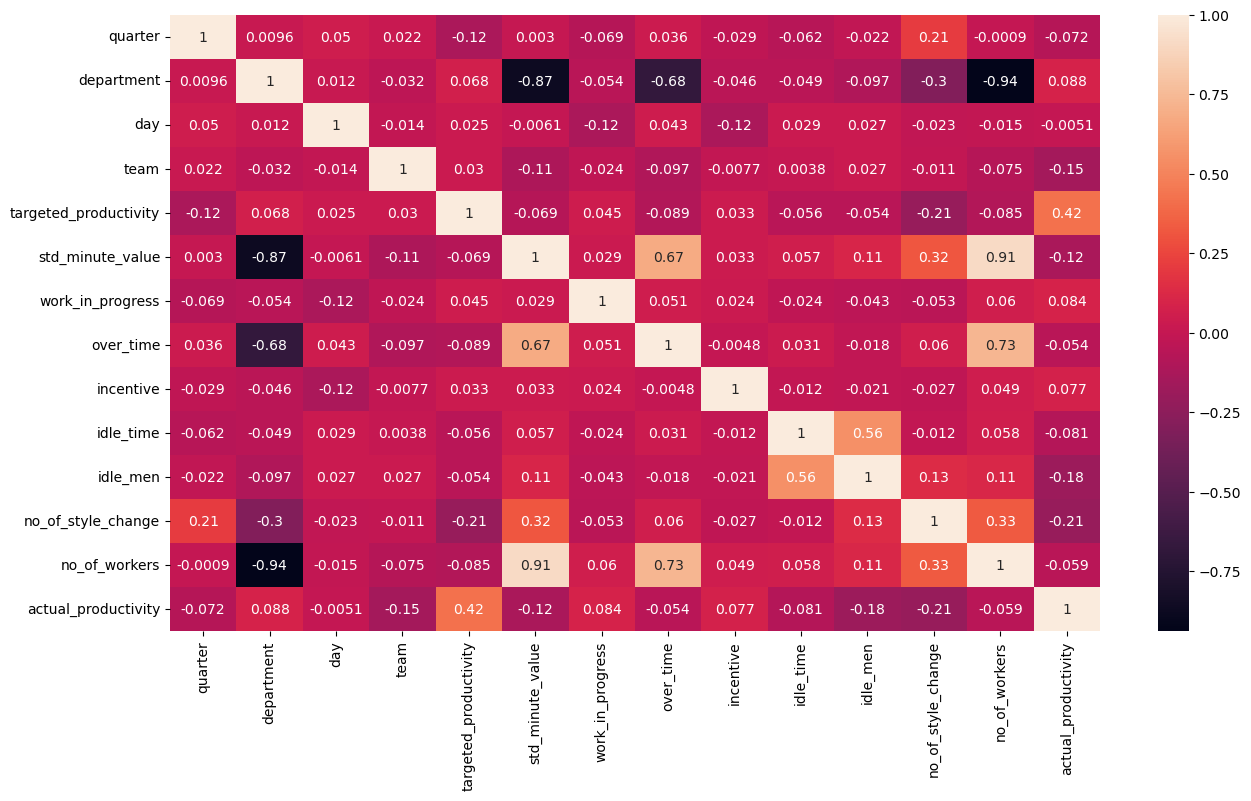

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()
     

Regression Predection

In [54]:



# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet



In [40]:

#the aspects of the date of interest (quarter of the month and day of the week)
#are extracted, therefore will drop date column .

df_enc.drop(columns=['date'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df_enc.columns)
     

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'std_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


In [41]:

#separating features and target for use in modelling

X = df_enc.drop(['actual_productivity'], axis=1)

y = df_enc['actual_productivity']

In [42]:

# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [44]:

#list with feature names
x_cols = X.columns
x_cols
     

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity',
       'std_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')

In [44]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


#highlighting the mean and range in the target column
print("mean: ", y.mean())
print("range: ", (y.max() - y.min()))



mean:  0.7350910969791145
range:  0.886732024


In [55]:
from sklearn.metrics import mean_squared_error

#fitting linear model
# Define an empty list 'rmses'
rmses = []

# Now you can append values to 'rmses' in a loop or elsewhere in your code

regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.0206255485793561
Root Mean Squared Error: 0.14361597605891935


In [46]:

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
rmses.append(f'Random forest model 1 RMSE: {rmse}')

Mean Squared Error: 0.01563096541900583
Root Mean Squared Error: 0.12502385939893965


In [47]:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')
     

Mean Squared Error: 0.018325432224420048
Root Mean Squared Error: 0.13537146015471668
